# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


In [2]:
# setting font sizes for graphs

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [3]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston.data.shape

(506, 13)

In [6]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [8]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [9]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [10]:
print(boston.target.shape)

(506,)


In [11]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [12]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

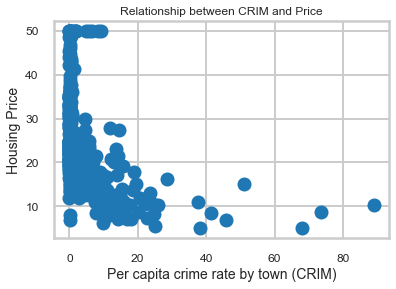

In [18]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

From the above graph we can see that the highest housing prices are in areas with the lowest crime rate. Which means that they have a negative relationship. Since we can draw a curved line that fits the data, their relationship is most likely non-linear. One thing that is interesting is that even when there is no crime the price fluctuates a lot, but this is probably due to the size of the house (which is not considered in this graph). Another interesting thing to note is that there are some houses which are on the highest spectrum of value (high price), but have some crime. These data points might be outliers. 

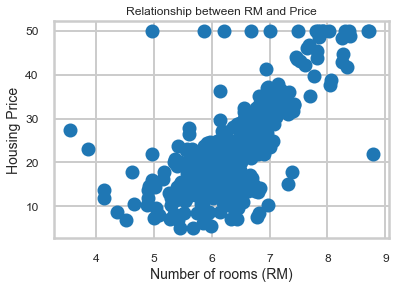

In [17]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Number of rooms (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()

We can see that there is a positive linear relationship between number of rooms and house prices. Houses with more rooms tend to have higher value (cost more). Of course there are some outliers, even houses with 5+ rooms can be found in the highest price range that cost as much as houses with 9 rooms. This could be due to a more desirable location.

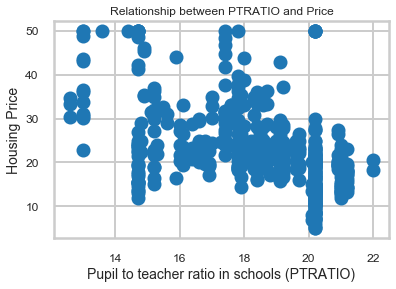

In [19]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil to teacher ratio in schools (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")
plt.show()

When looking at the relationship between Price and PTRTIO we can assume it is nonlinear. It seems that the pupil to teacher ratio in schools doesn't affect house prices. For example when PTRATIO is 20, we have the lowest and highest house price value.

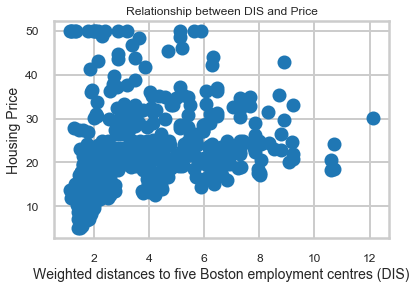

In [20]:
# scatter plot between *DIS* and *PRICE*
plt.scatter(bos.DIS, bos.PRICE)
plt.xlabel("Weighted distances to five Boston employment centres (DIS)")
plt.ylabel("Housing Price")
plt.title("Relationship between DIS and Price")
plt.show()

From the graph above we can see there is a non-linear relationship between the weighted distance to five Boston employment centers and housing prices. Where DIS is below 4, the range of house prices is greatest (from minimum to maximum value).

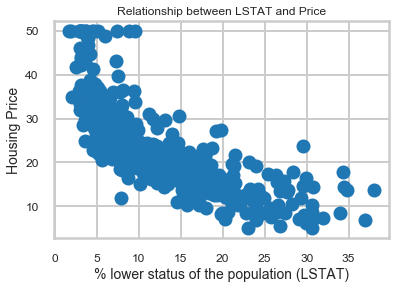

In [21]:
# scatter plot between *LSTAT* and *PRICE*
plt.scatter(bos.LSTAT, bos.PRICE)
plt.xlabel("% lower status of the population (LSTAT)")
plt.ylabel("Housing Price")
plt.title("Relationship between LSTAT and Price")
plt.show()

There is a negative non-linear relationship between LSTAT and price. This means that in areas with greater percentage of lower status population, house prices drops.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

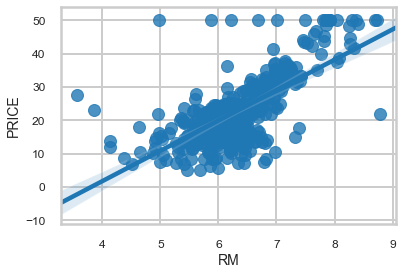

In [23]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)
plt.show()

### Histograms
***


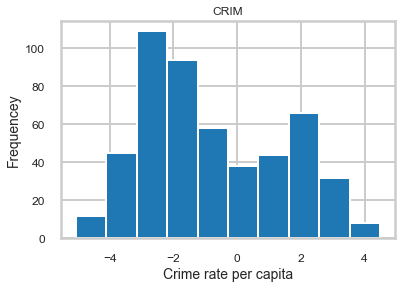

In [24]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

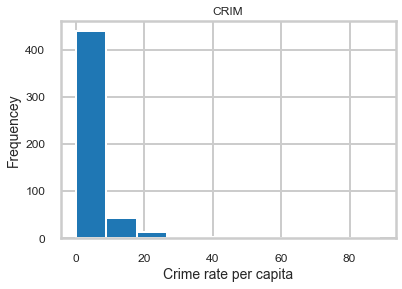

In [25]:
# histogram for CRIM
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

np.log() is a natural logarithm, i.e. the power to which e would have to be raised to equal x. Which means, for real-valued input data types, log always returns real output. It is the inverse of the exponential function.
The main reason to use np.log is to respond to skewness towards large values, cases in which one or few points are larger than group of the data. The second is to show percent change or multiplicative factors.

By making this transformation we gain to make highly skewed distributions less skewed. This can be valuable both for making patterns in the data more interpretable (easier interpretation of results) and for helping to meet the assumptions of inferential statistics. If there are outliers in dependent or independent variables, a log transformation could reduce the influence of those observations.

First thing to notice on a histogram without transformation, is that all the data are positive (greater than zero). And also when not using np.log, we can see that the data appears noisy and right-skewed.
From non-transformation histogram we can only see that there is a high frequency of low values for CRIM.

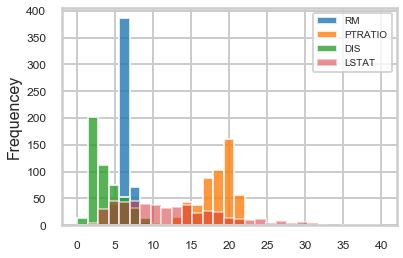

In [26]:
# plot the histogram for *RM* and *PTRATIO*, *DIS*, *LSTAT*
bins = np.linspace(0, 40, 30)
plt.hist(bos.RM, bins, alpha=0.8, label='RM')
plt.hist(bos.PTRATIO, bins, alpha=0.8, label='PTRATIO')
plt.hist(bos.DIS, bins, alpha=0.8, label='DIS')
plt.hist(bos.LSTAT, bins, alpha=0.5, label='LSTAT')
plt.ylabel("Frequencey", fontsize=16)
plt.legend(loc='upper right', fontsize=10)
plt.show()

In [28]:
# Pearson correlation coefficient to measure linear correlation between variables
bos_short = bos[['RM', 'PTRATIO', 'DIS', 'LSTAT', 'PRICE']]
variables_corr = bos_short.corr(method='pearson')
variables_corr

,RM,PTRATIO,DIS,LSTAT,PRICE
RM,1.000000,-0.355501,0.205246,-0.613808,0.695360
PTRATIO,-0.355501,1.000000,-0.232471,0.374044,-0.507787
DIS,0.205246,-0.232471,1.000000,-0.496996,0.249929
LSTAT,-0.613808,0.374044,-0.496996,1.000000,-0.737663
PRICE,0.695360,-0.507787,0.249929,-0.737663,1.000000


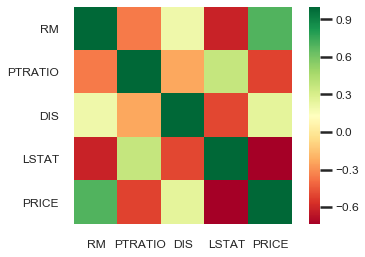

In [29]:
# correlation matrix for selected variables
sns.heatmap(bos_short.corr(), square=True, cmap='RdYlGn')
plt.show()

From the above correlation matrix and table, we can see that the biggest negative correlation is between house price (PRICE) and % lower status of the population (LSTAT). On the other hand, the average number of rooms per dwelling (RM) and house prices (PRICE) have the biggest positive correlation.

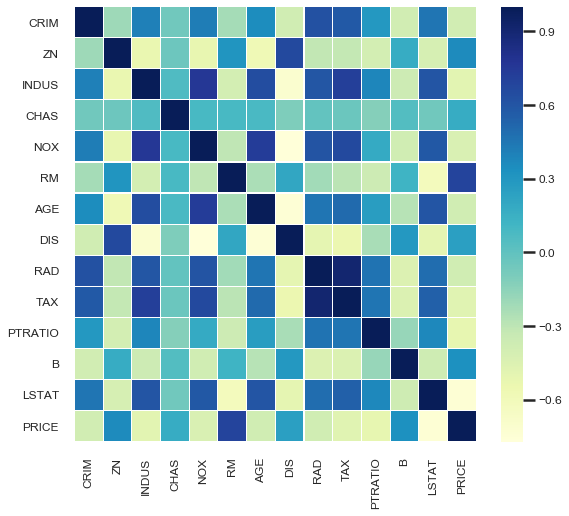

In [30]:
# correlation Matrix for all variables
corrmat = bos.corr()   
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

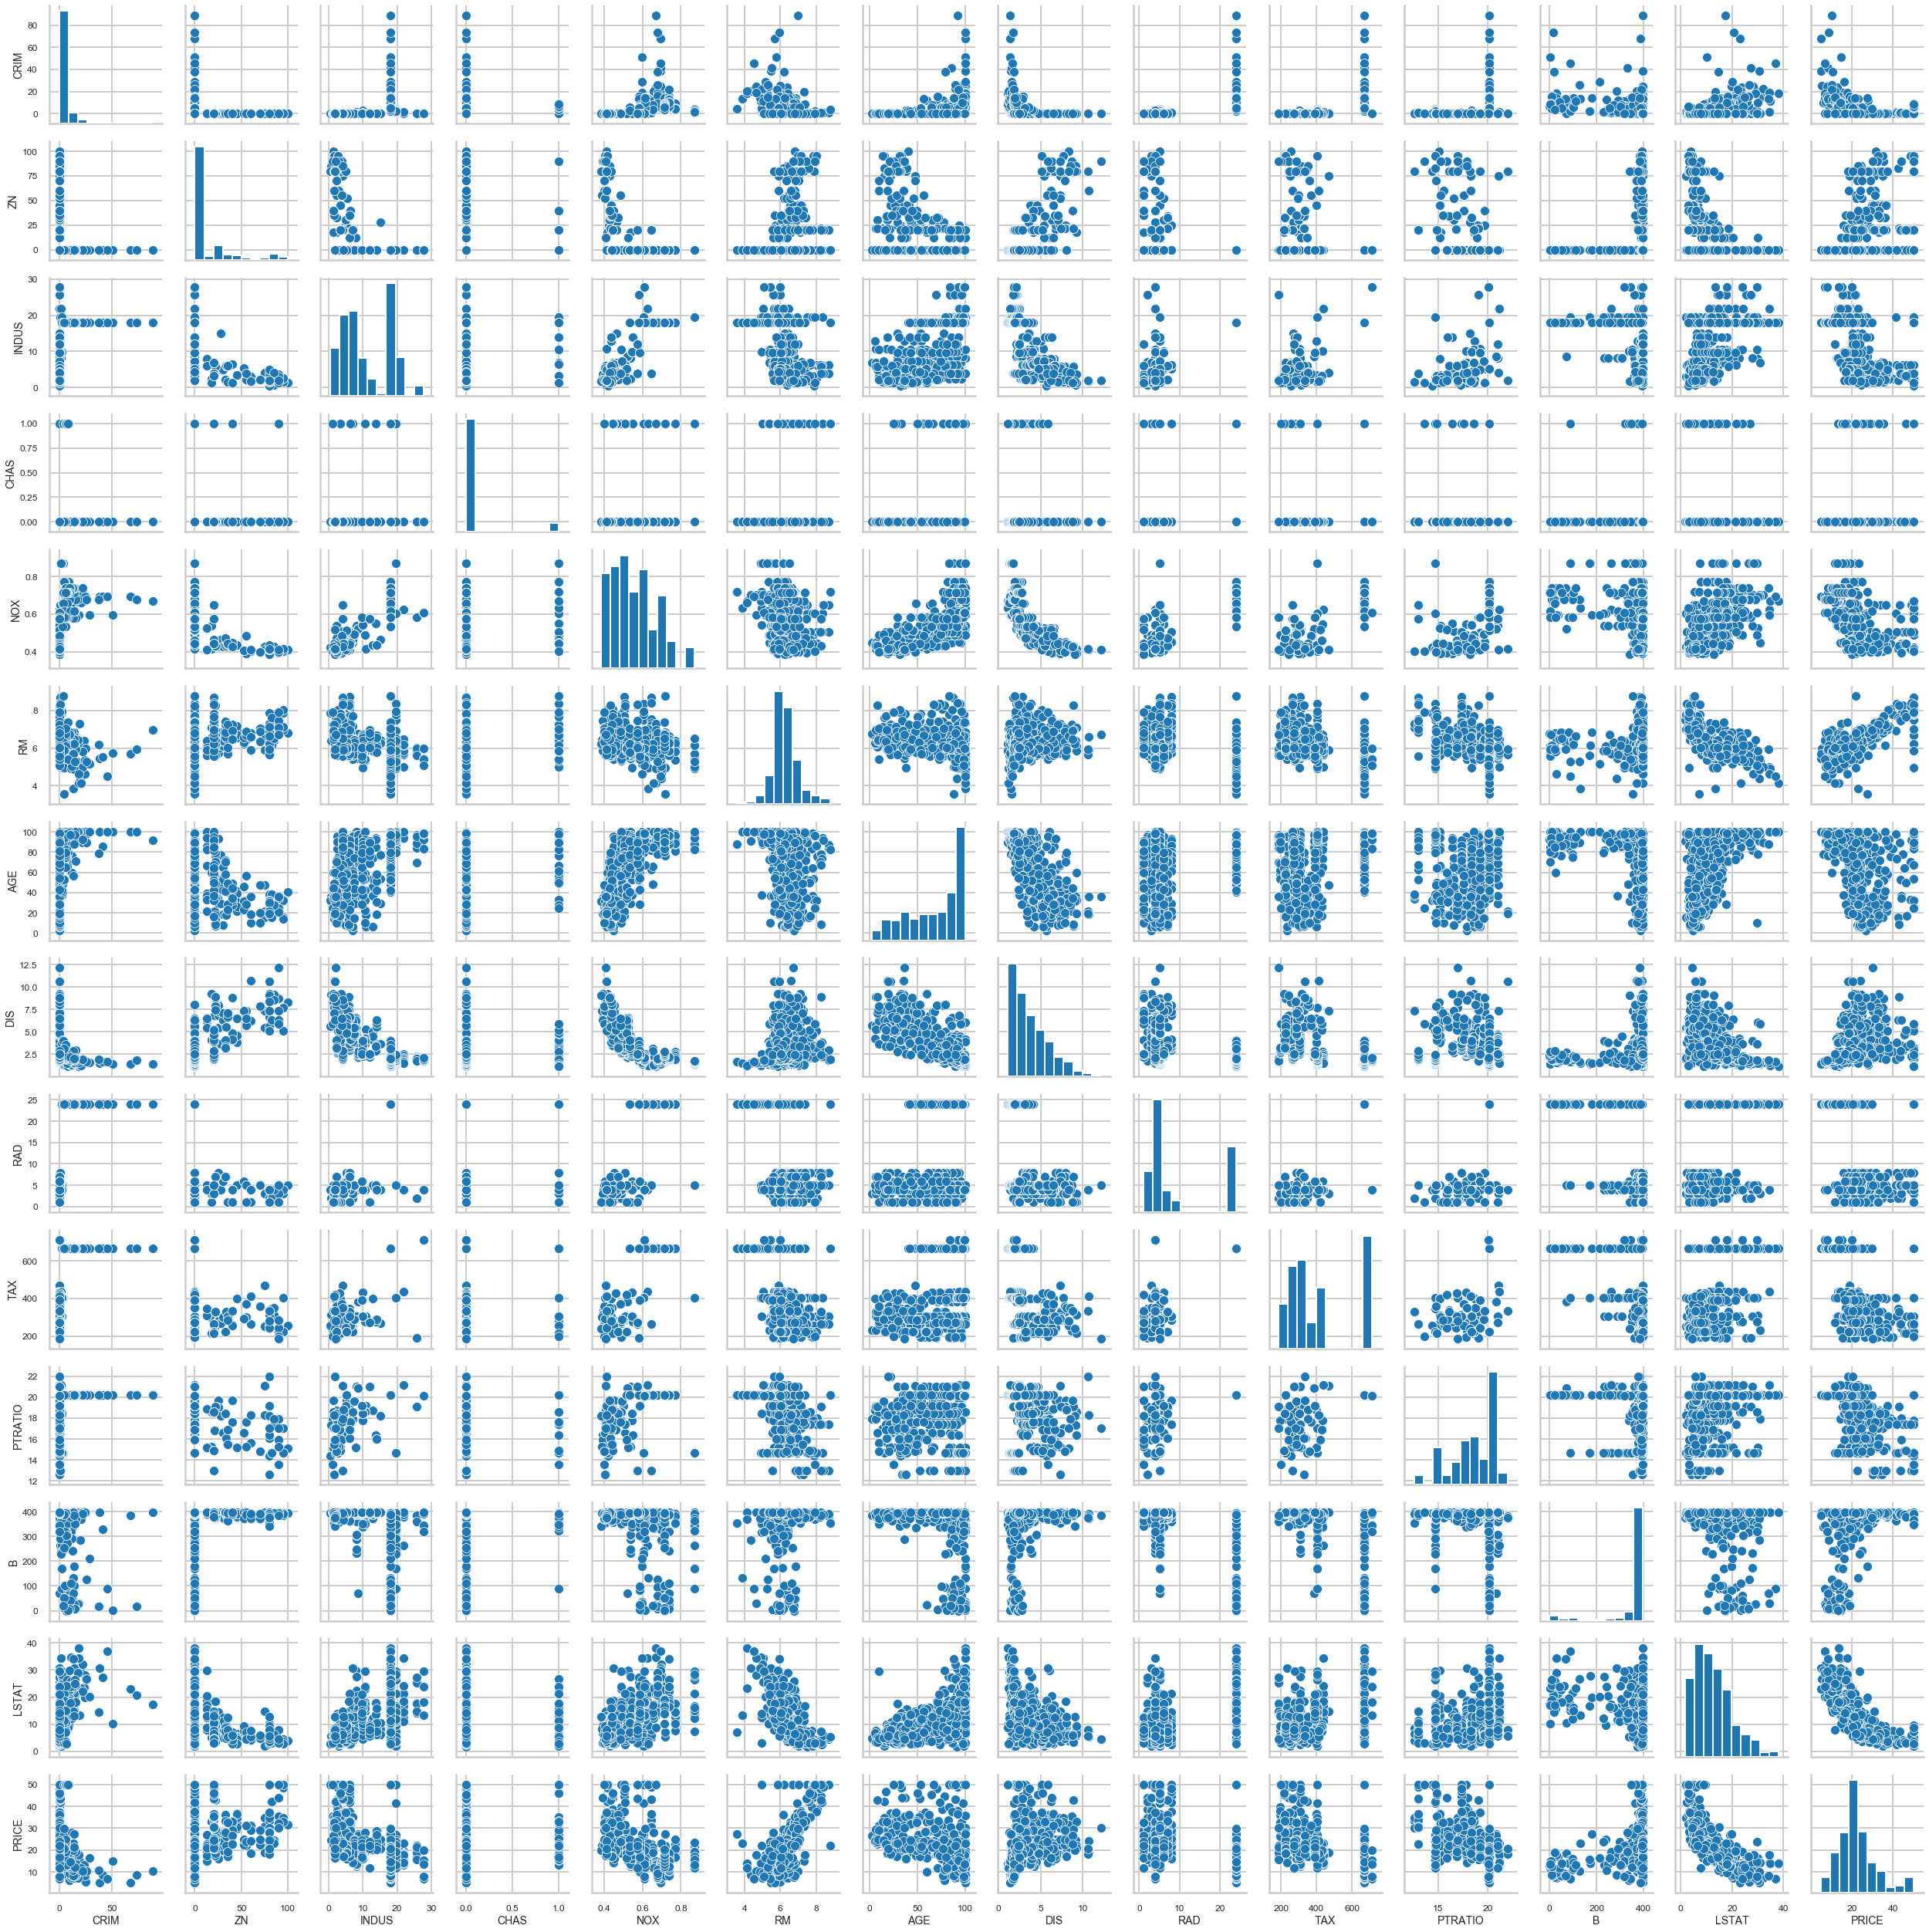

In [178]:
sns.pairplot(bos)

The pairs plot builds on two basic figures, the histogram and scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles that show the relationship (or lack thereof) between two variables.

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [31]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [32]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           2.49e-74
Time:                        10:22:38   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

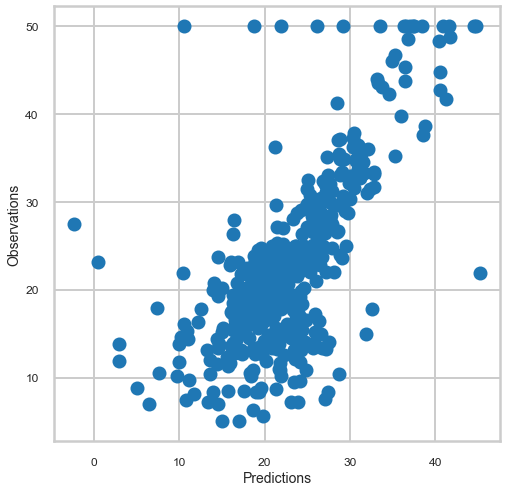

In [35]:
# plotting original vs. predicted prices
fig, ax = plt.subplots(figsize=(8,8))
_ = ax.scatter(m.fittedvalues, bos.PRICE)
_ = plt.xlabel('Predictions')
_ = plt.ylabel('Observations')
plt.show()

There is an uphill pattern as you move from left to right, this indicates a positive relationship between predictions and observations.
First thing is that there are a lot of points around value 20. There are also some predictions that are far from real values, for example the model predicted a price of close to zero, but it was actually 23 or 24. The one prediction that makes the least sense is the point with a negative value. On the other hand it predicted a price that was too high (it predicted 44 but it was 22). We can see that when the true value is less than 20, the model is not that good at predictions, since values are more spread around than at larger values. It also had a challenge to correctly predict value 50. The biggest prediction error was almost 40 (it predicted 10.5 when the true value was 50).

### Fitting Linear Regression using `sklearn`


In [33]:
from sklearn.linear_model import LinearRegression

In [36]:
X = bos.drop('PRICE', axis = 1)

# this creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [ ]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [37]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [ ]:
# your turn


Exercise: How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not?

By adding fit_intercept=False to LinearRegression object (LinearRegression(fit_intercept=False)), you change the model to not fit an intercept term. It is recommended to use an intercept. The only time when not to use it, is when it can do harm to a model.

No, it is not enough that the residuals are normally distributed. They also need to be non-correlated (the residual from one prediction has no effect on the residual from another prediction).
So, inferential procedures for linear regression are typically based on the normality assumption for the residuals. However, as the sample sizes increase, the normality assumption for the residuals is not needed. More precisely, if we consider repeated sampling from our population, for large sample sizes, the distribution (across repeated samples) of the ordinary least squares estimates of the regression coefficients follow a normal distribution. As a consequence, for moderate to large sample sizes, non-normality of residuals should not adversely affect the usual inferential procedures. In short, if you have reasonably many data, then homoscedasticity (equal variances of the residuals) is more important than normality.
Another assumption made by linear regression is that the residuals have constant variance. That is, their variance does not change across different levels of the predictors. In contrast to the normality assumption, if the residuals do not satisfy the constant variance assumption, then standard errors and confidence intervals (based on standard formulae) will be adversely affected, irrespective of whether the sample size is large or not. However even in this case, the ordinary least squares estimators are unbiased. If the constant variance assumption is violated, we should use the robust sandwich variance estimator.

Exercise: True or false. To use linear regression, Y must be normally distributed. Explain your answer.

False, it can be, but doesn’t have to be. It is not important if it is normally distributed, but Y should be a continuous variable. The normality assumption for linear regression applies to the prediction errors, not the outcome/dependable variable Y. The usual statement is that the errors (residuals) are normally distributed with a mean of 0 with equal variance.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [38]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509015


In [39]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [40]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [41]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

In [ ]:
# your turn


Exercise: Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?

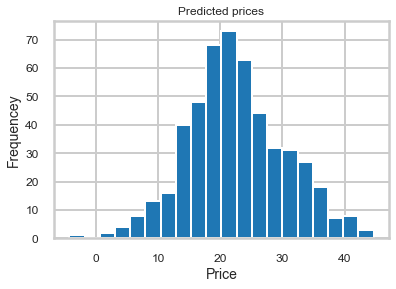

In [42]:
plt.hist(lm.predict(X), bins=20)
plt.title("Predicted prices")
plt.xlabel("Price")
plt.ylabel("Frequencey")
plt.show()

Predicted prices aren't normally distributed. Prices around the value of 20 have the most predictions. The outliers are predictions that are less than 0, which don’t make sense in the real world. There are also a few predictions with prices greater than 40.

Should we do anything special with them?
Investigate to figure out, what houses have these values and what the variables are that drive prices.

Exercise: Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).

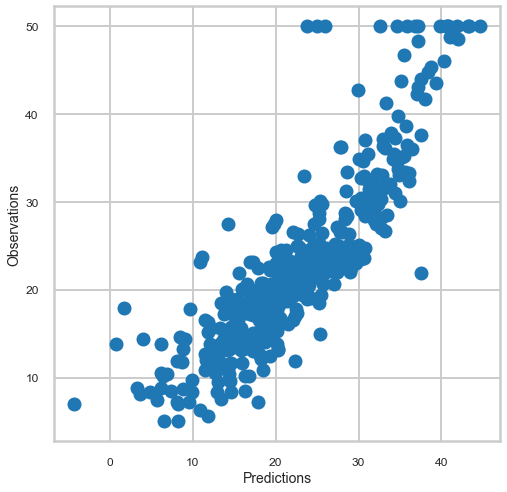

In [43]:
# plotting original vs. predicted prices
fig, ax = plt.subplots(figsize=(8,8))
_ = ax.scatter(lm.predict(X), bos.PRICE)
_ = plt.xlabel('Predictions')
_ = plt.ylabel('Observations')
plt.show()

Exercise: We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?

* `scikit-learn` has more useful features to build a final model, but 'statsmodels' is a good method to analyze your data before you put it into your model.
* `scikit-learn` is a better option for machine learning topics, 'statsmodels' is more suitable for statistical analysis.
* `scikit-learn` only gives the fitting parameters, R^2, MSE, etc. While `statsmodels` also provides p-values, standard errors on each of the parameters, t-tests, confidence interval, etc.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [44]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [45]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837065056


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [46]:
# select variables from dataframe
pupil_teacher = bos.PTRATIO.values
house_prices = bos.PRICE.values

In [47]:
pupil_teacher = pupil_teacher.reshape(-1, 1)
house_prices = house_prices.reshape(-1, 1) 

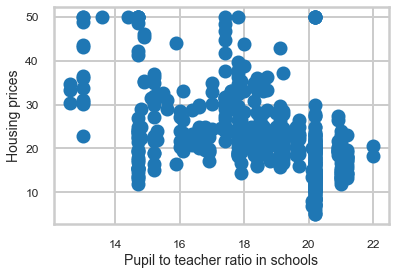

In [48]:
plt.scatter(pupil_teacher, house_prices)
plt.xlabel('Pupil to teacher ratio in schools')
plt.ylabel('Housing prices')
plt.show()

Exercise: Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.

In [49]:
# create a LinearRegression object
lin_reg = LinearRegression()
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
# fit the model
lin_reg.fit(pupil_teacher, house_prices)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
# calculate the mean squared error
mse_PTRATIO = np.mean((house_prices - lin_reg.predict(pupil_teacher)) ** 2)
print(mse_PTRATIO)

62.652200013769274


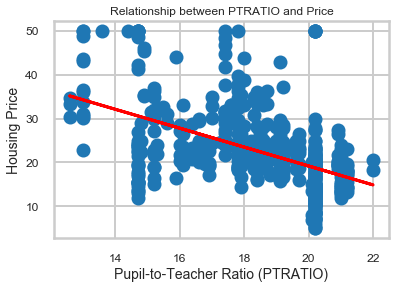

In [52]:
# scatter plot with regression line (red)
plt.scatter(pupil_teacher, house_prices)
plt.plot(pupil_teacher, lin_reg.predict(pupil_teacher), color='red')
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")
plt.show()

In the above graph the red line represents a regression line. It is the line which best fits the data in the above scatter plot so that we can predict the response for any new feature values.

In [53]:
lin_reg.intercept_, lin_reg.coef_

(array([62.34462747]), array([[-2.1571753]]))

The interpretation for the intercept: $62,345 is the average housing price, given that all of the independent variables are zero.

On average, one unit increase in the pupil to teacher ratio, is associated with the descrease of $2,157 in house price net of the other variables.

Exercise: Calculate (or extract) the 𝑅2 value. What does it tell you?

In [54]:
# calculate residual sum-of-squares (RSS) and explained sum-of-squares (ESS)
RSS = np.sum((house_prices - lin_reg.predict(pupil_teacher)) ** 2)
ESS = np.sum((lin_reg.predict(pupil_teacher) - np.mean(house_prices)) ** 2)
TSS = RSS + ESS

In [55]:
# calculate coefficient of determination
R2 = ESS/TSS
R2

0.2578473180092227

In [56]:
# extract coefficient of determination
print(lin_reg.score(pupil_teacher, house_prices))

0.257847318009223


In [57]:
print(str(round(R2*100,2))+'% of variance in housing price is explained by the model.')

25.78% of variance in housing price is explained by the model.


Exercise: Compute the F-statistic. What does it tell you?

In [58]:
# calculating mean squared errors and F-statistic
N = len(pupil_teacher)
K = 1
MSE = RSS/(N-K-1)
MSR = ESS/K
F = MSR/MSE
F

175.10554287569525

The F-statistic value tells us that the mean residual sum of squares (MRS) is 175.11 times larger than the mean error sum of squares (MES).
In other words, in the model explained variance is 175.11 times greater then unexplained variance.

Exercise: Take a close look at the F-statistic and the t-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.

In [59]:
# using statsmodels
lin_model_PTRATIO = ols('PRICE ~ PTRATIO', bos).fit()
print(lin_model_PTRATIO.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           1.61e-34
Time:                        10:28:11   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

In [60]:
# p-value for F-statistic
lin_model_PTRATIO.f_pvalue

1.6095094784729786e-34

In [61]:
# value for F-statistic
lin_model_PTRATIO.fvalue

175.1055428756955

F-statistics is 175.11 and Prob(F-statistics) is very small (less than 0.05). Hence we can reject the null hypothesis, that none of coefficients have any effect on Y (PRICE).

In [62]:
# t-statistic values
lin_model_PTRATIO.tvalues

Intercept    20.581406
PTRATIO     -13.232745
dtype: float64

In [63]:
# print the p-values for the model coefficients
lin_model_PTRATIO.pvalues

Intercept    9.077444e-69
PTRATIO      1.609509e-34
dtype: float64

null hypothesis: There is no relationship between PTRATIO and PRICE (β1 equals zero).

alternative hypothesis: There is a relationship between PTRATIO and PRICE (β1 is not equal to zero).

The t-statistic for the regression coefficient (PTRATIO) and its p-value tells us that it is significant at a significance level of α=0.05. Which means PTRATIO and PRICE are independent and we can reject the null hypothesis.

According to p-value for F-statistic, the overall regression is significant as well. They are both statistically significiant, because there is only one regression coefficient in the model. (The standard error that appears in the calculation of the t-statistic is a function of the other regression coefficients in the model. And in this case there are no other.)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [ ]:
# your turn

In [64]:
# create a model
feature_cols = ['CRIM', 'RM', 'PTRATIO']
X_variables = bos[feature_cols]
y_price = bos.PRICE

# instantiate and fit
lin_model_2 = LinearRegression()
lin_model_2.fit(X_variables, y_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
# predict values
predict_2 = lin_model_2.predict(X_variables)

Exercise: Compute or extract the F-statistic. What does it tell you about the model?

In [66]:
# calculate residual sum-of-squares (RSS) and explained sum-of-squares (ESS)
RSS_2 = np.sum((y_price - predict_2) ** 2)
ESS_2 = np.sum((predict_2 - np.mean(y_price)) ** 2)

In [67]:
# calculating mean squared errors and F-statistic
N_2 = len(X_variables)
K_2 = 3
MSE_2 = RSS_2/(N_2-K_2-1)
MSR_2 = ESS_2/K_2
F_2 = MSR_2/MSE_2
F_2

245.16449030064592

The F-statistic value tells us that the mean residual sum of squares (MRS) is 245.165 times greater than the mean error sum of squares (MES).
In the model explained variance is 245.165 times greater then unexplained variance.

Exercise: Compute or extract the R2 statistic. What does it tell you about the model?

In [68]:
# extract R2
print(lin_model_2.score(X_variables, y_price))

0.5943412940723471


In [69]:
# calculate R2
TSS_2 = RSS_2 + ESS_2
R2_2 = ESS_2/TSS_2
R2_2

0.5943412940723468

In this case R2 statistic tells us that 59.43% of variance in housing price is explained by the model.

Exercise: Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.

In [70]:
# create a fitted model with all three features
lm3 = ols(formula='PRICE ~ CRIM + RM + PTRATIO', data=bos).fit()

In [71]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           6.15e-98
Time:                        10:31:16   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

All variables, except Intercept, are significant at a significance level of α=0.05 according to the P>|t| for each one. We can reject the null hypothesis for CRIM, RM an PTRATIO, that there is association between these features and PRICE. But fail to reject the null hypothesis for Intercept, there is no association.

Looking at the F-test, the overall regression is significant, i.e. the predictors are jointly informative.
RM is positively associated with housing price. While CRIM, PTRATIO and Intercept are negatively associated with housing price.

INTERPRETATION OF COEFFICIENTS:

On average, a unit increase in CRIM is associated with a descrease of $\$0,205$ in house price net of the other variables.
On average, a unit increase in RM is associated with an increase of $\$7,380$ in house price net of the other variables. 
On average, a unit increase in PTRTIO is associated with a descrease of $\$1,070$ in house price net of the other variables. 

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [72]:
# create a fitted model with five features
lm4 = ols(formula='PRICE ~ CRIM + RM + PTRATIO + DIS + LSTAT', data=bos).fit()

# print the summary
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     228.7
Date:                Sun, 01 Sep 2019   Prob (F-statistic):          1.10e-126
Time:                        10:32:48   Log-Likelihood:                -1539.2
No. Observations:                 506   AIC:                             3090.
Df Residuals:                     500   BIC:                             3116.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.8945      4.080      5.611      0.0

In [73]:
# create a model
five_feature_cols = ['CRIM', 'RM', 'PTRATIO', 'DIS', 'LSTAT']
X_five_variables = bos[five_feature_cols]
y_price = bos.PRICE

# instantiate and fit
lin_model_3 = LinearRegression()
lin_model_3.fit(X_five_variables, y_price)

# make predictions
predict_3 = lin_model_3.predict(X_five_variables)

In [74]:
# # calculate residual sum-of-squares (RSS) and explained sum-of-squares (ESS), mean squared errors and F-statistic
RSS_3 = np.sum((y_price - predict_3) ** 2)
ESS_3 = np.sum((predict_3 - np.mean(y_price)) ** 2)
N_3 = len(X_five_variables)
K_3 = 5
MSE_3 = RSS_3/(N_3 - K_3 - 1)
MSR_3 = ESS_3/K_3
F_3 = MSR_3/MSE_3
F_3

228.70405530218895

Model with five variables/features has an F-statistic of 228.7 and AIC of 3090. The previous model with three features has an F-statistic of 245.2 and the AIC of 3232. Based on both AIC values, this means that the model with five features provides a better fit to the data than the model that only includes three features. We can notice, the p-value of the F-test decreases with an increasing number of predictors K. Adding 'DIS' and 'LSTAT' predictors to the model increases the significance of the regression.

Now we can calculate F-statistic revisited and its p-value.

null hypothesis: A model with more variables does not give a significantly better fit to the data than a model with fewer variables (naive model).

alternative hypothesis: A model with more variables gives a significantly better fit to the data than a model with fewer variables (naive model).


In [75]:
# F-statistic revisited
DF_red = N_2 - K_2 - 1
DF_full = N_3 - K_3 - 1
F_revisited = ((RSS_2 - RSS_3)/(DF_red - DF_full))/(RSS_3/DF_full)
F_revisited

83.35415426764442

In [89]:
# calculating p-value for F_revisited
print(stats.f.sf(F_revisited, DF_red - DF_full, DF_full))

5.735010892091541e-32


In [77]:
# F_revisited will have an F-distribution, with (p2−p1, n−p2) degrees of freedom
# p1, p2 = number of parameters in each model
p_model1 = 3
p_model2 = 5
n_observations = 506
print(stats.f.sf(F_revisited, p_model2 - p_model1, n_observations - p_model2))

5.628100605300492e-32


Under calculated F-value and p-value (alpha = 0.05), we reject the null hypothesis, that the model with five variables does not provide a significantly better fit than the model with 3 variables.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [ ]:
# Your turn.


Exercise: Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?

In [78]:
# prediction values
pred_val = lm3.fittedvalues.copy()

In [79]:
# calculate prediction errors
residuals_3_var = y_price - pred_val

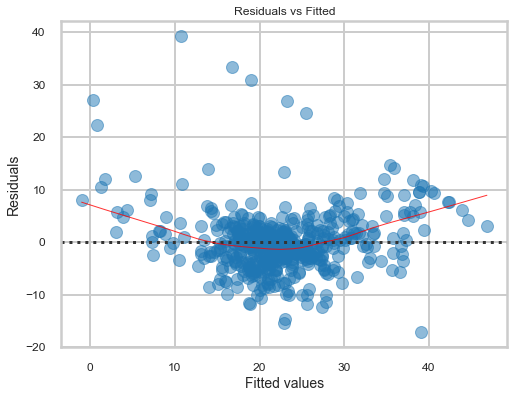

In [80]:
plt.figure(figsize=(8,6))
_ = sns.residplot(pred_val, y_price, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
_ = plt.title('Residuals vs Fitted')
_ = plt.xlabel('Fitted values')
_ = plt.ylabel('Residuals')
plt.show()

A slightly u-shaped red line is an indicator that there might be a non-linear relationship between fitted values and residuals. We can see that the majority of residuals fall between -20 and 20. The points, where the values of residuals are greater than 20, might be outliers (Influential Points).
From this graph it is hard to make any other assumptions regarding the model.

Exercise: Construct a quantile plot of the residuals. What does the plot tell you?

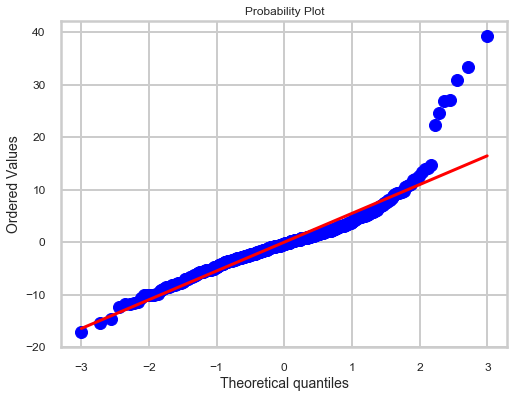

In [81]:
fig, ax = plt.subplots(figsize=(8,6))
_, (__, ___, r) = stats.probplot(residuals_3_var, plot=ax, fit=True)
plt.show()

This plot shows if the residuals are normally distributed. A good normal QQ plot has all of the residuals lying on or close to the red line.
Looking at the graph above, there are several points that fall far away from the red line. This is indicative of the residuals not being normally distributed. We can also see these seven points in the above scatter plot, where the value of residuals is greater than 20. These points might just be outliers.

Exercise: What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?

From fitted vs. residual scatter plot we can see the distribution of values and their correlation (positive, negative, linear, non-linear). On the other hand, a quantile plot tells us if the data are normally distributed or not and about the changes in normality.

Exercise: Identify any outliers (if any) in your model and write a story describing what these outliers might represent.

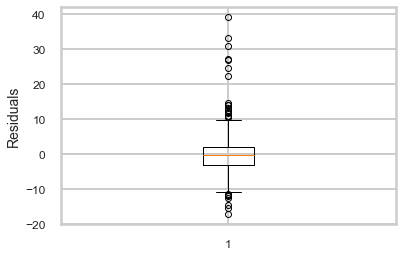

In [81]:
plt.boxplot(residuals_3_var)
plt.ylabel('Residuals')
plt.show()

In [82]:
# create a copy of the original dataframe
import copy
bos_copy = bos.copy()

In [83]:
# create a copy of the residuals
copy_residuals = residuals_3_var.copy()

In [85]:
# sort residuals in ascending order and find the indexes with highest values
copy_residuals.sort_values().tail(10)

407    13.935697
161    14.121065
186    14.624107
367    22.336529
370    24.534761
369    26.814372
365    27.127667
371    30.991160
372    33.310083
368    39.298836
dtype: float64

In [190]:
# check rows for residuals with highest values
bos.iloc[[365, 367, 368, 369, 370, 371, 372], :]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
369,5.66998,0.0,18.1,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.1,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0


In [191]:
# summary statistics for residuals
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The above boxplot shows us the distribution of residuals based on a five number summary (minimum, first quartile (Q1), median, third quartile (Q3), and maximum). We can see that the minimum value is -10 and maximum value is 10. Median, which represents the middle value of the residuals, is almost zero. That is a good sign. It also confirms that there might be outliers where values of residuals are greater than 20.

An outlier is an observation whose dependent-variable value is unusual given its values on the predictor variables. An outlier may indicate a sample peculiarity or may indicate a data entry error or other problem.

What we can do is check entries in the dataframe. These points have RAD values at the maximum level. CRIM value higher than 75% of data points. Except two data points, all have AGE value greater than 75% of data points. Three of data points have a lower LSTAT value than the minimum. All these data points have high PRICE values.

Exercise: Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.

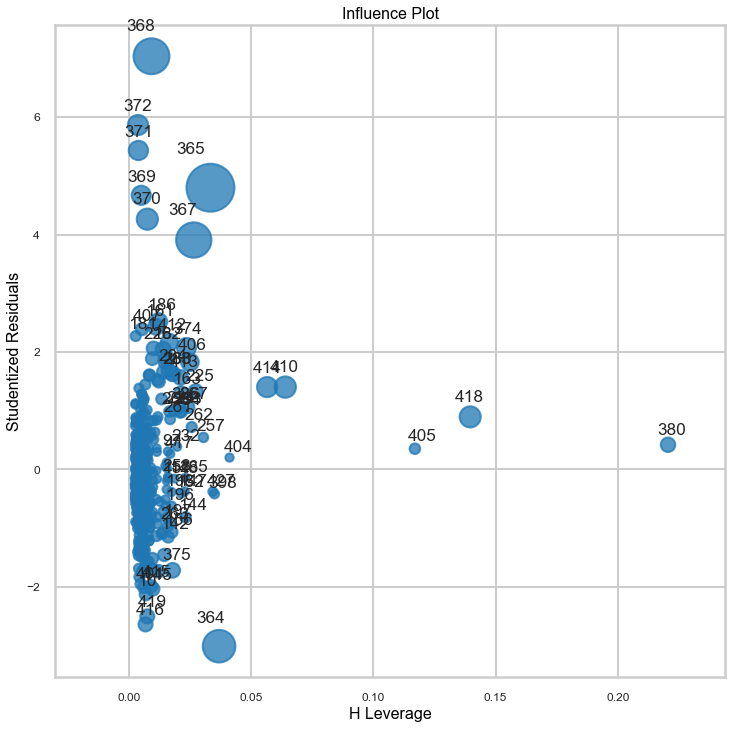

In [77]:
# leverage plot
fig, ax = plt.subplots(figsize=(12,12))
fig = sm.graphics.influence_plot(lm3, alpha  = 0.05, ax = ax, criterion="cooks")

In [78]:
# leverage plot, from statsmodels internals
model_leverage = lm3.get_influence().hat_matrix_diag

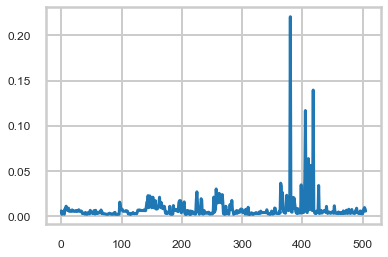

In [79]:
plt.plot(model_leverage)
plt.show()

From both plots we can see that there are some points with high value. To understand them, we should check these points in the dataframe and see what they might tell us. To easier understand what to look for, we use a statistic summary of variables.

In [104]:
# extract leverage points
bos.iloc[380, :]

CRIM        88.9762
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.6710
RM           6.9680
AGE         91.9000
DIS          1.4165
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B          396.9000
LSTAT       17.2100
PRICE       10.4000
Name: 380, dtype: float64

In [114]:
bos.iloc[405, :]

CRIM        67.9208
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.6930
RM           5.6830
AGE        100.0000
DIS          1.4254
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B          384.9700
LSTAT       22.9800
PRICE        5.0000
Name: 405, dtype: float64

In [115]:
bos.iloc[418, :]

CRIM        73.5341
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.6790
RM           5.9570
AGE        100.0000
DIS          1.8026
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B           16.4500
LSTAT       20.6200
PRICE        8.8000
Name: 418, dtype: float64

In [105]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


If we compare these three rows with summary statistics, we can see that all three have very high crime rates, higher that 75% of all values. The row 308 actually has the highest crime rate (maximum value). And all three have price value on a minimum level (around 5).

Exercise: Remove the outliers and high leverage points from your model and run the regression again. How do the results change?

In [109]:
bos_copy.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


We have identified rows with outliers and high leverage points above, and now we can remove these rows from the dataframe.

In [168]:
# remove residuals with the highest values and leverages from the dataframe
bos_residuals_leverage_less = bos_copy.drop([365, 367, 368, 369, 370, 371, 372, 380, 405, 418], axis=0)

In [169]:
# create a fitted model with all three features
lm3_residuals_leverage_less = ols(formula='PRICE ~ CRIM + RM + PTRATIO', data=bos_residuals_leverage_less).fit()

In [170]:
lm3_residuals_leverage_less.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     414.5
Date:                Thu, 29 Aug 2019   Prob (F-statistic):          3.19e-134
Time:                        17:43:22   Log-Likelihood:                -1468.9
No. Observations:                 496   AIC:                             2946.
Df Residuals:                     492   BIC:                             2963.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0479      3.294     -1.836      0.067     -12.519       0.423
CRIM          -0.2556      0.035     -7.267      0.000      -0.325      -0.187
RM             7.9167      0.336     23.560      0.000       7.256       8.577
PTRATIO       -1.1223      0.107    -10.448      0.000      -1.333      -0.911
==============================================================================
Omnibus:                       15.619   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.793
Skew:                           0.147   Prob(JB):                     3.39e-07
Kurtosis:                       4.164   Cond. No.                         312.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the OLS regression results, we can see that F-statistic has a greater value than before. Which means that this model has more explained variance than unexplained. It also has higher R-squared, 71.7% of that variance is explained by the model. Based on the F-statistic, R-squared and AIC, this model provides a better fit to the data than the model before.
All predictors are still significant (alpha = 0.05). Even though the p-value for the Intercept is smaller than before, it is still not significant. Overall, based on the p-value (3.19e-134) for F-statistic, the model is statistically significant.
Plotting graphs shouldn't show any variations from previous ones, except not having outliers and high leverage points.

In [171]:
# prediction values
predict_lm3_residuals_leverage_less = lm3_residuals_leverage_less.fittedvalues.copy()

In [172]:
# calculate prediction errors
residuals_lm3_residuals_leverage_less = bos_residuals_leverage_less.PRICE - predict_lm3_residuals_leverage_less

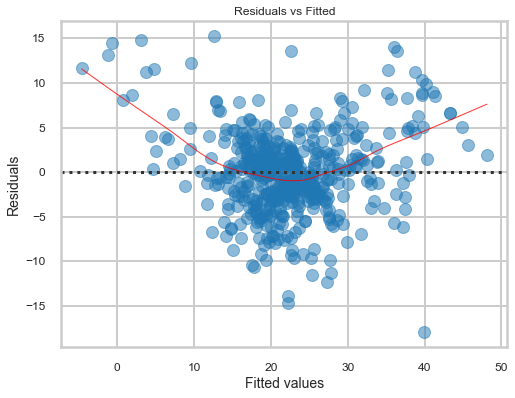

In [173]:
plt.figure(figsize=(8,6))
_ = sns.residplot(predict_lm3_residuals_leverage_less, bos_residuals_leverage_less.PRICE, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
_ = plt.title('Residuals vs Fitted')
_ = plt.xlabel('Fitted values')
_ = plt.ylabel('Residuals')
plt.show()

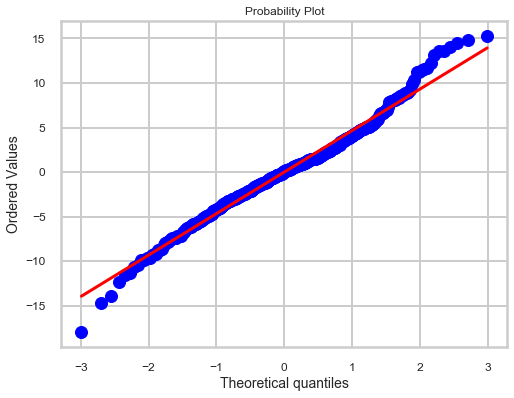

0.9831504778297505


In [174]:
fig, ax = plt.subplots(figsize=(8,6))
_, (__, ___, r) = stats.probplot(residuals_lm3_residuals_leverage_less, plot=ax, fit=True)
plt.show()
print(r**2)

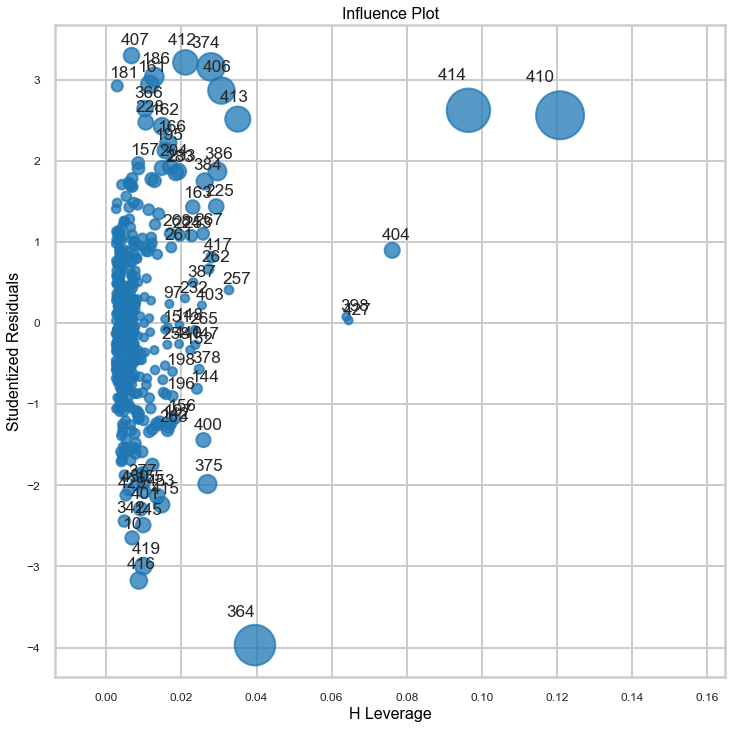

In [175]:
fig, ax = plt.subplots(figsize=(12,12))
fig = sm.graphics.influence_plot(lm3_residuals_leverage_less, alpha = 0.05, ax = ax, criterion="cooks")

As we assumed, plots are not different from previous ones.